In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class GradientDescent:
    
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = [] # path of search
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x) # update gradient
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

以下を最適化
$$
f(x,y)=5x^{2}-6xy+3y^{2}+6x-6y \\
\nabla f = 
\left[\begin{array}{c}
    10x-6y+6 \\ -6x+6y-6 \\
\end{array}\right]
$$

In [13]:
def f(xx):
    x = xx[0] # x
    y = xx[1] # y
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

In [14]:
def df(xx):
    x = xx[0] # x
    y = xx[1] # y
    return np.array([10*x - 6*y + 6, -6*x + 6*y - 6])

In [36]:
algo = GradientDescent(f, df)
initial = np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


# Plot the track

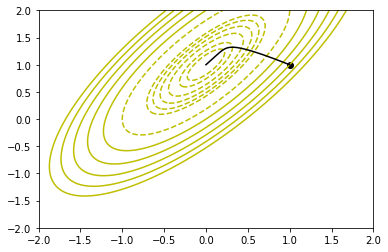

In [37]:
plt.scatter(initial[0], initial[1], color='k', marker='o')
plt.plot(algo.path_[:,0], algo.path_[:,1], color='k', linewidth=1.5)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs,ys)
# xmesh : Matirix of x coordinate for each mesh point
# ymesh : Matirix of y coordinate for each mesh point

z = f([xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)
# before broadcast, converse to 1D array

levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, z, levels = levels, colors='y')



# Change the Learning rate $ \alpha $

In [38]:
algos = []
alphas = [.1, .2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)

/Users/ryunagai/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
/Users/ryunagai/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/ryunagai/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


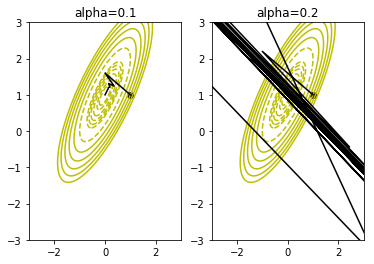

In [57]:
xmin, ymin, xmax, ymax = -3, -3, 3, 3

xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs,ys)
# xmesh : Matirix of x coordinate for each mesh point
# ymesh : Matirix of y coordinate for each mesh point

z = f([xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)
# before broadcast, converse to 1D array

levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

fig, ax = plt.subplots(1, 2)

for i in range(len(alphas)):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color='k', marker='o')
    ax[i].plot(algos[i].path_[:,0], algos[i].path_[:,1], color='k', linewidth=1.5)
    ax[i].contour(xs, ys, z, levels = levels, colors='y')